# Lesson 1 PyMC Fundamentals and Model Setup

In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [2]:
data = [1, -2, 3]

### Basic Model Structure

In [3]:
# Basic model template

with pm.Model() as model:
    # Define priors
    parameter = pm.Normal('parameter', mu=0, sigma=1)

    # Define likelihood
    obs = pm.Normal('obs', mu=parameter, sigma=1, observed=data)

    # Sample from posterior

    trace = pm.sample(1000, return_inferencedata=True)

Output()

### Simple Linear Regression

In [4]:
# Set random
np.random.seed(42)

In [19]:
# Generate synthetic data
n_points = 10
true_slope = 2.5
true_intercept = 1
true_sigma = 0.5

x = np.linspace(0, 10, n_points)
y = true_intercept + true_slope * x + np.random.normal(0, true_sigma, n_points)

In [20]:
# Build Bayesian linear regression model

with pm.Model() as linear_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slope = pm.Normal('slope', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value
    mu = intercept + slope * x

    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

    # Sample from posterior

    trace = pm.sample(2000, tune=1000, return_inferencedata=True, progressbar=True)

Output()

In [21]:
# Analyze results
print(az.summary(trace, hdi_prob=0.95))

            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
intercept  0.717  0.363     0.017      1.465      0.010    0.010    1232.0   
sigma      0.599  0.171     0.341      0.955      0.004    0.004    1621.0   
slope      2.527  0.062     2.404      2.645      0.002    0.002    1211.0   

           ess_tail  r_hat  
intercept    1412.0    1.0  
sigma        1705.0    1.0  
slope        1531.0    1.0  


### Model Visualization

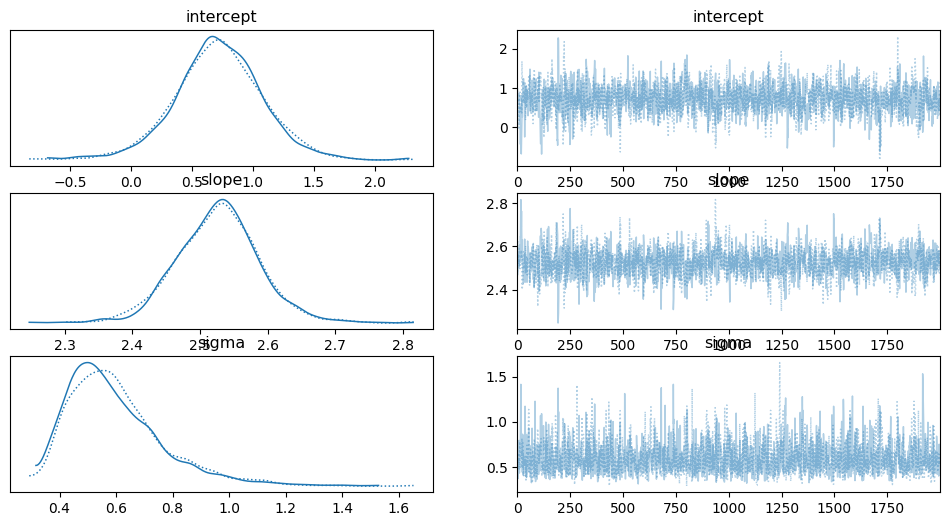

In [22]:
# Plot trace plots
az.plot_trace(trace, var_names=['intercept','slope','sigma'])
plt.show()

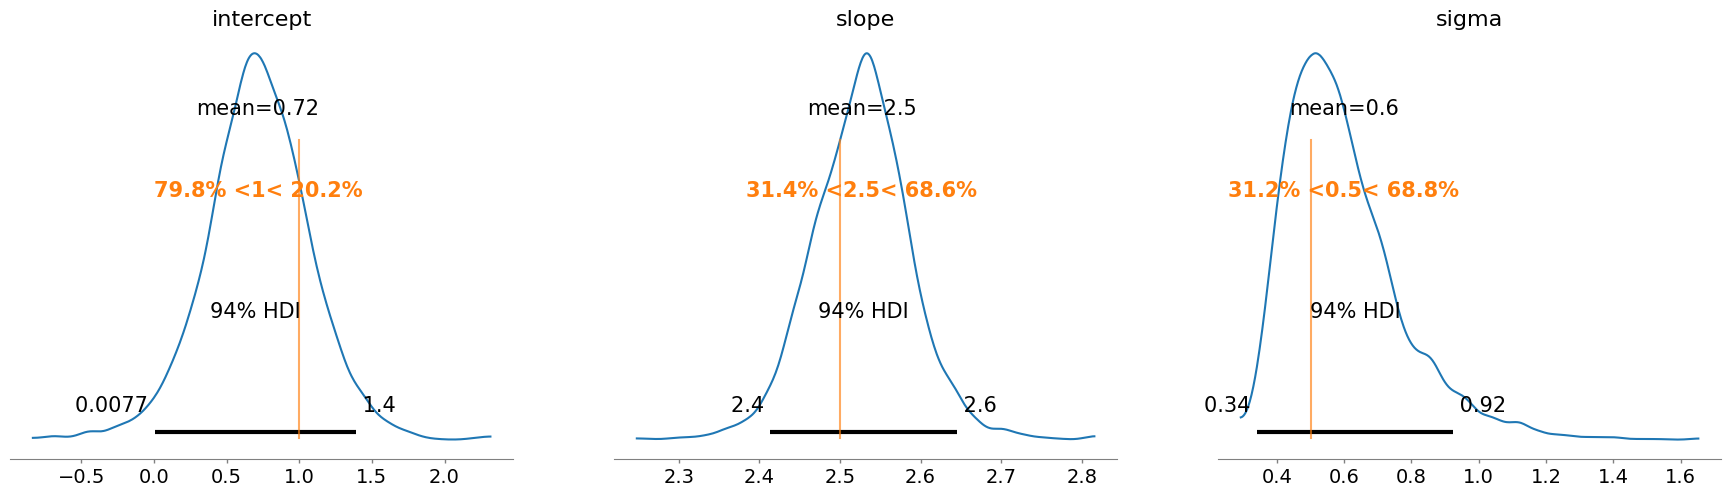

In [24]:
# Plot posterior distributions
az.plot_posterior(trace, var_names=['intercept','slope','sigma'],
                  ref_val=[true_intercept, true_slope, true_sigma])
plt.show()

In [29]:
# Check convergence diagnostics
print(f'R-hat values: {az.rhat(trace)}')
print(f'Effective sample size: {az.ess(trace)}')

R-hat values: <xarray.Dataset> Size: 24B
Dimensions:    ()
Data variables:
    intercept  float64 8B 1.001
    sigma      float64 8B 1.001
    slope      float64 8B 1.001
Effective sample size: <xarray.Dataset> Size: 24B
Dimensions:    ()
Data variables:
    intercept  float64 8B 1.232e+03
    sigma      float64 8B 1.621e+03
    slope      float64 8B 1.211e+03
